<a href="https://colab.research.google.com/github/maxGrigorenko/DistributionClassifier/blob/maxGrigorenko%2Ffirst_part/src/experiments_first_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация распределений. Первая часть проекта

## 1. Исследуем, как зависят характеристики графов от случайных величин


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product


from graph_common_functions import *
from distibution_functions import *

In [3]:
def plot_sigma(points_number, graph_type, begin, end, number_of_experiments=5, k=3, d=0.1, n=100):

    dominating_number_arr = []
    delta_arr = []
    sigma_arr = np.linspace(begin, end, points_number)
    for sigma in tqdm(sigma_arr):
        dominating_number, delta = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type=graph_type,
                                             distribution="normal", sigma=sigma, k=k, d=d)
        dominating_number_arr.append(dominating_number)
        delta_arr.append(delta)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(sigma_arr, dominating_number_arr, color='blue')
    ax1.set_title(f'{graph_type} graph dominating number from different sigma')
    ax1.set_xlabel('sigma')
    ax1.set_ylabel('dominating number')

    ax2.plot(sigma_arr, delta_arr, color='red')
    ax2.set_title(f'{graph_type} graph delta from different sigma')
    ax2.set_xlabel('sigma')
    ax2.set_ylabel('delta')

    plt.tight_layout()
    plt.show()


Проведем несколько экспериментов, зафиксировав размер выборки n = 50

100%|██████████| 50/50 [00:59<00:00,  1.19s/it]


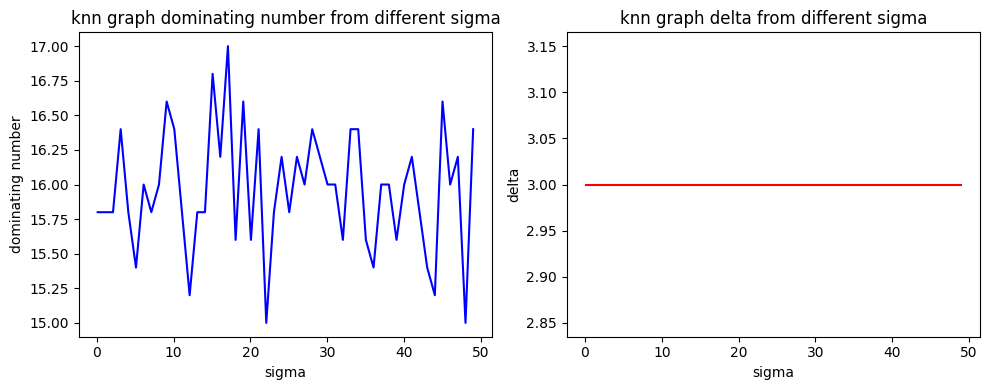

In [15]:
plot_sigma(50, "knn", begin=0.1, end=49.0, number_of_experiments=5, k=3, n=50) # k = 3

Несложно понять, почему delta константа (из-за использования knn), но также можем видеть, что очень слабо отличаются и средние значения числа доминирования (от 15 до 17), на графике не видно какой-то закономерности, вероятно, при большем числе экспериментов среднее число доминирования тоже будет стремиться к константе

100%|██████████| 50/50 [08:31<00:00, 10.23s/it]


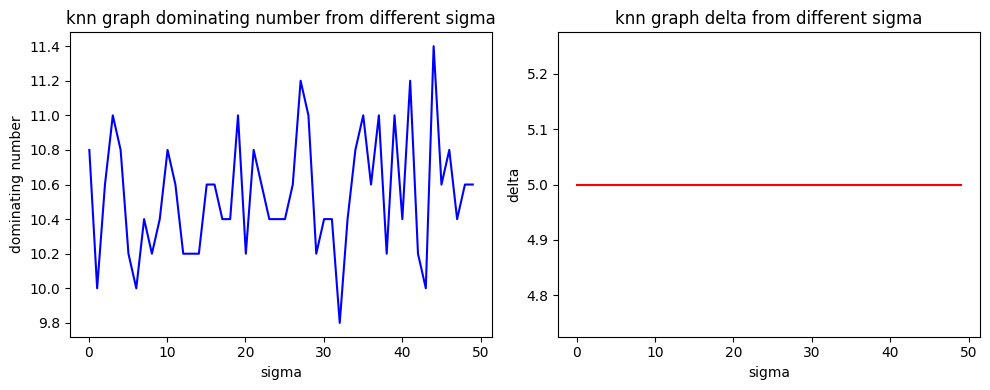

In [16]:
plot_sigma(50, "knn", begin=0.1, end=49.0, number_of_experiments=5, k=5, n=50) # k = 5

100%|██████████| 50/50 [04:39<00:00,  5.59s/it]


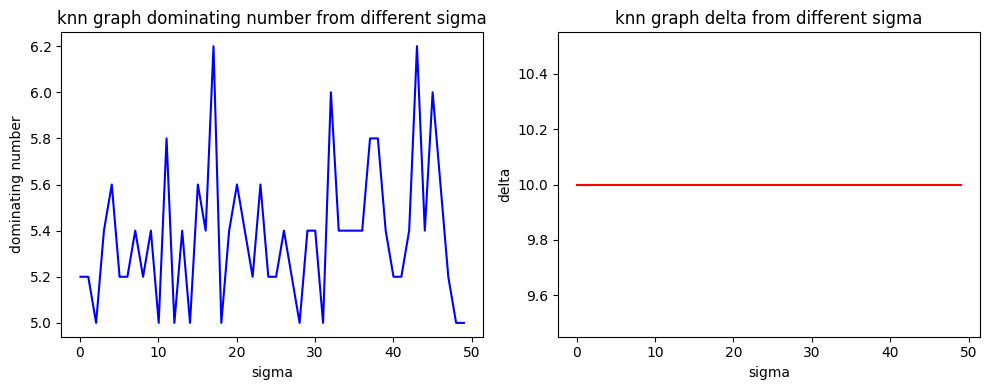

In [17]:
plot_sigma(50, "knn", begin=0.1, end=49.0, number_of_experiments=5, k=10, n=50) # k = 10

При различных k меняется только среднее значение числа доминирования, но никакой зависимости с параметром sigma не видно.

Теперь проведем несколько экспериментов с дистанционным графом

100%|██████████| 50/50 [00:00<00:00, 244.86it/s]


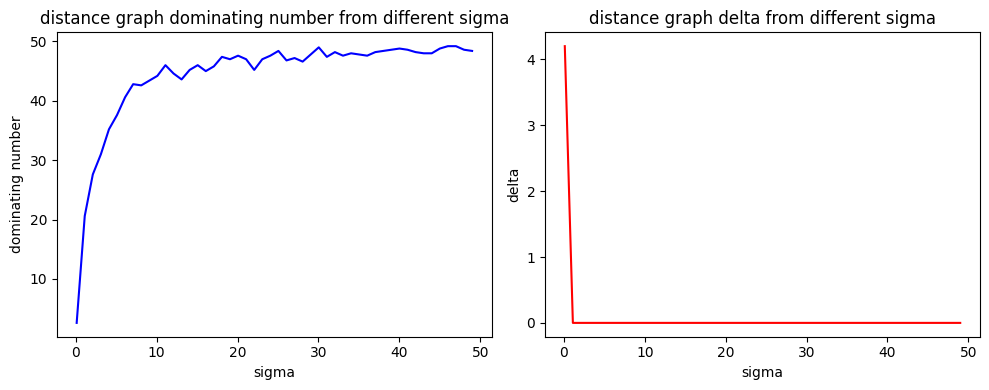

In [5]:
plot_sigma(50, "distance", begin=0.1, end=49.0, number_of_experiments=5, d=0.1, n=50) # d = 0.1

100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


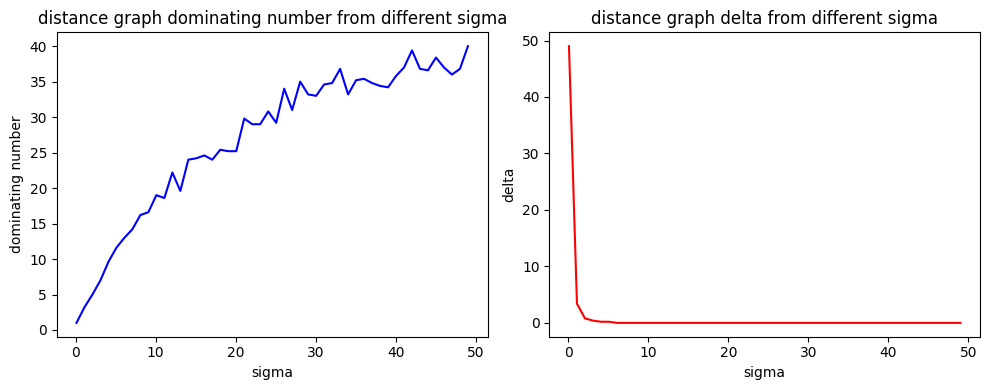

In [7]:
plot_sigma(50, "distance", begin=0.1, end=49.0, number_of_experiments=5, d=1, n=50)

Отчетливо видна зависимость числа доминирования от sigma.  
Теперь рассмотрим распределение Лапласа

In [2]:
def plot_beta(points_number, graph_type, begin, end, number_of_experiments=5, k=3, d=0.1, n=100):

    dominating_number_arr = []
    delta_arr = []
    beta_arr = np.linspace(begin, end, points_number)
    for beta in tqdm(beta_arr):
        dominating_number, delta = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type=graph_type,
                                             distribution="laplace", beta=beta, k=k, d=d)
        dominating_number_arr.append(dominating_number)
        delta_arr.append(delta)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(beta_arr, dominating_number_arr, color='blue')
    ax1.set_title(f'{graph_type} graph dominating number from different beta')
    ax1.set_xlabel('beta')
    ax1.set_ylabel('dominating number')

    ax2.plot(beta_arr, delta_arr, color='red')
    ax2.set_title(f'{graph_type} graph delta from different beta')
    ax2.set_xlabel('beta')
    ax2.set_ylabel('delta')

    plt.tight_layout()
    plt.show()


100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


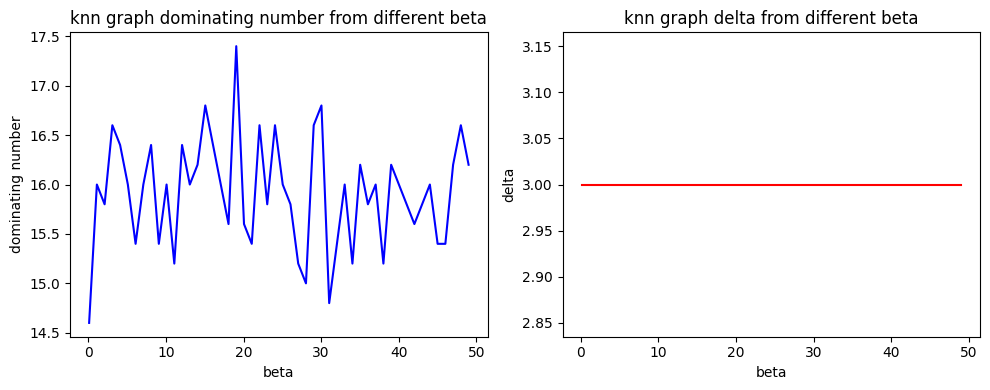

In [3]:
plot_beta(50, "knn", begin=0.1, end=49.0, number_of_experiments=5, k=3, n=50) # k = 3

Наблюдаем ту же картину, что и с нормальным распределением - не видно никакой зависимости характеристик графа от параметра распределения. В связи с этим нет смысла далее изучать характеристики графа knn.

100%|██████████| 50/50 [00:00<00:00, 200.71it/s]


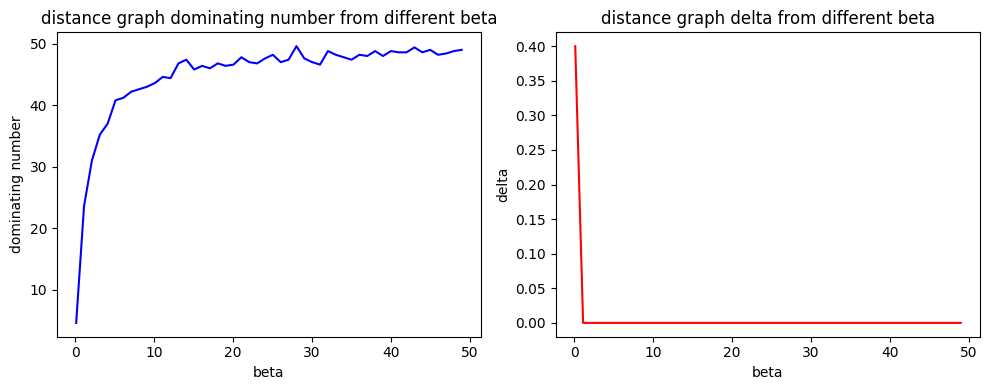

In [5]:
plot_beta(50, "distance", begin=0.1, end=49.0, number_of_experiments=5, d=0.1, n=50) # d = 0.1

100%|██████████| 50/50 [00:10<00:00,  4.62it/s]


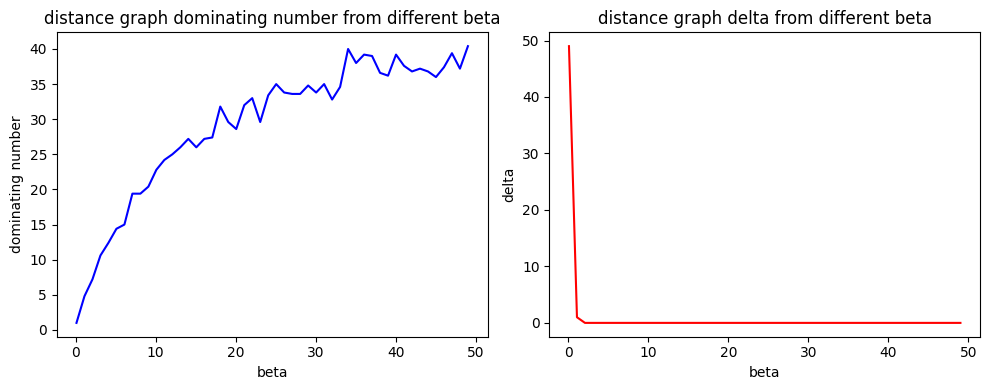

In [6]:
plot_beta(50, "distance", begin=0.1, end=49.0, number_of_experiments=5, d=1, n=50) # d = 0.1

Снова имеет похожую ситуацию с нормальным распределением.